In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('weatherAus.csv')
display(df)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df.dropna(subset=['RainTomorrow'] , inplace= True)

In [6]:
year=pd.to_datetime(df.Date).dt.year
train_df=df[ year < 2015]
test_df=df[ year > 2015]
val_df=df[ year == 2015]
print('tain_df.shape:', train_df.shape)
print('test_df.shape:', test_df.shape)
print('val_df.shape:' ,val_df.shape)

tain_df.shape: (98988, 23)
test_df.shape: (25974, 23)
val_df.shape: (17231, 23)


In [7]:
input_cols=list(train_df.columns)[1:-1]
target_col='RainTomorrow'

In [8]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [9]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [10]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

In [11]:
#how do you find the numeric columns 
import numpy as np
train_inputs.select_dtypes(include=np.number).columns.tolist()


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [12]:
##how do you find the categorical columns 
train_inputs.select_dtypes(include='object').columns.tolist()

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [13]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes(include='object').columns.tolist()

In [14]:
#from here i can learn every column has how many missing value and and i  can sort it in ascending order so i can see which columns has greater missing values
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [15]:
#here what does imputer do imputer takes the null value and fill it with the mean of the null value's before and after value it can not only does mean it also has many feature but here i will use meaan
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean').fit(df[numeric_cols])

In [16]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

**Scaling The Numeric feature
it takes min and maximum range of the number and convert it into 0 and 1**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(df[numeric_cols])
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])


In [18]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


**Encoding Categorical Data**
We have to convert the categorical data like yes or no in a numerical data like 0 and 1 and we do it by **OneHotEncoder** it craetes column of each of the item of this column and gives the value of this column like a matrix actually in which row it has value it give 1 there and others it gives 0 and before that we have to fill the nan value so that **OneHotEncoder** run smoothly 

In [19]:
from sklearn.preprocessing import OneHotEncoder


In [20]:
#fill the nan value
train_inputs[categorical_cols]=train_df[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols]=test_df[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols]=val_df[categorical_cols].fillna('Unknown')


In [21]:
encoder= OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [22]:
encoded_cols= list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [23]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

C:\Users\user.FEL-OPS-89155\AppData\Local\Temp\ipykernel_16064\2318466707.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
C:\Users\user.FEL-OPS-89155\AppData\Local\Temp\ipykernel_16064\2318466707.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
C:\Users\user.FEL-OPS-89155\AppData\Local\Temp\ipykernel_16064\2318466707.py:1: PerformanceWarning: DataFrame is highly fragment

In [24]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,Unknown,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.566038,0.523629,0.018329,0.037723,0.525852,ENE,0.193798,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037723,0.525852,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037723,0.525852,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037723,0.525852,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037723,0.525852,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Lets just drop the textual categorical columns so that we can have only numerical data**

In [25]:
x_train=train_inputs[numeric_cols+encoded_cols]
x_test=test_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]

In [26]:
x_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,0.566038,0.523629,0.018329,0.037723,0.525852,0.193798,0.046154,0.103448,0.92,0.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037723,0.525852,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,0.266509,0.533081,0.000000,0.037723,0.525852,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,0.285377,0.568998,0.000000,0.037723,0.525852,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,0.327830,0.599244,0.000000,0.037723,0.525852,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [27]:
# Decision Tree is beginning from here
from sklearn.tree import DecisionTreeClassifier

In [28]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [29]:
#Evaluation
train_preds=model.predict(x_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [31]:
accuracy_score(train_preds,train_targets)

0.9999797955307714

In [32]:
train_probs= model.predict_proba(x_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [33]:
model.score(x_val,val_targets)

0.7928152747954268

**We can see that it causes overfitting because model has learned the training examples perfect but doesn't generalize well to previously unseen examples( when we test the model with the validation dataset it gives 70% accuracy but when we test the model with training dataset it gives 100% accuracy thus it causes overfitting and it is normal between tree type model so we have to handle this overfitting)**

In [34]:
#Visualization
from sklearn.tree import plot_tree, export_text


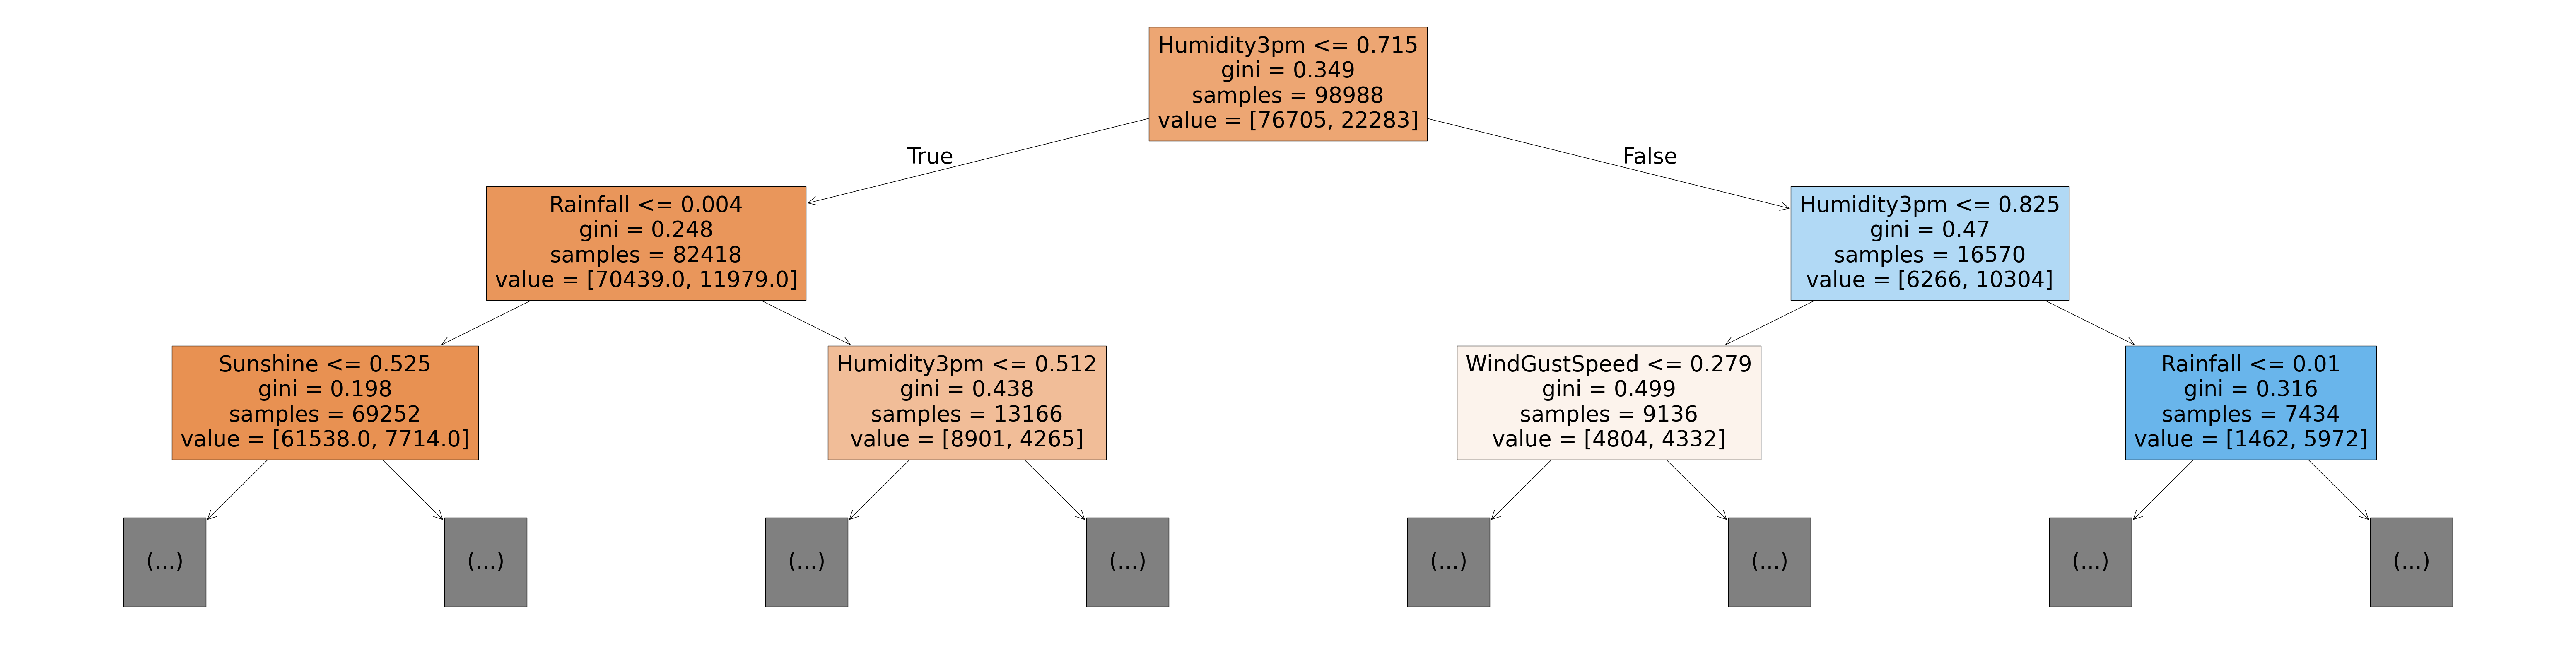

In [35]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=x_train.columns, max_depth=2, filled=True);

In [36]:
tree_text=export_text(model, max_depth=10, feature_names=list(x_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <= 0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am >  0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [37]:
importance_df=pd.DataFrame({'feature': x_train.columns, 'importance':model.feature_importances_}).sort_values('importance',ascending=False)

In [38]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261666
11,Pressure3pm,0.062909
2,Rainfall,0.059698
5,WindGustSpeed,0.055278
4,Sunshine,0.049697
8,Humidity9am,0.039776
0,MinTemp,0.034395
14,Temp9am,0.033930
10,Pressure9am,0.033880
1,MaxTemp,0.032072


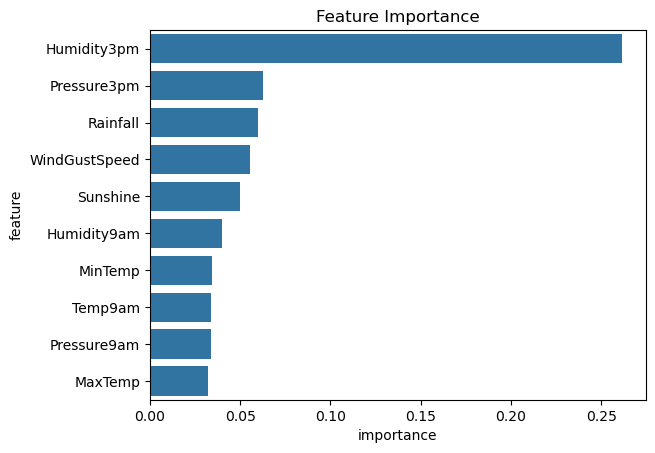

In [39]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

Process overfitting handling called **Regularlization** and we can solve the overfitting by **Hyperparameter Tunning** 

In [40]:
model=DecisionTreeClassifier(max_depth=3, random_state=42)

In [41]:
model.fit(x_train,train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [42]:
model.score(x_train,train_targets)

0.8291308037337859

In [43]:
model.score(x_val,val_targets)

0.8334397307178921

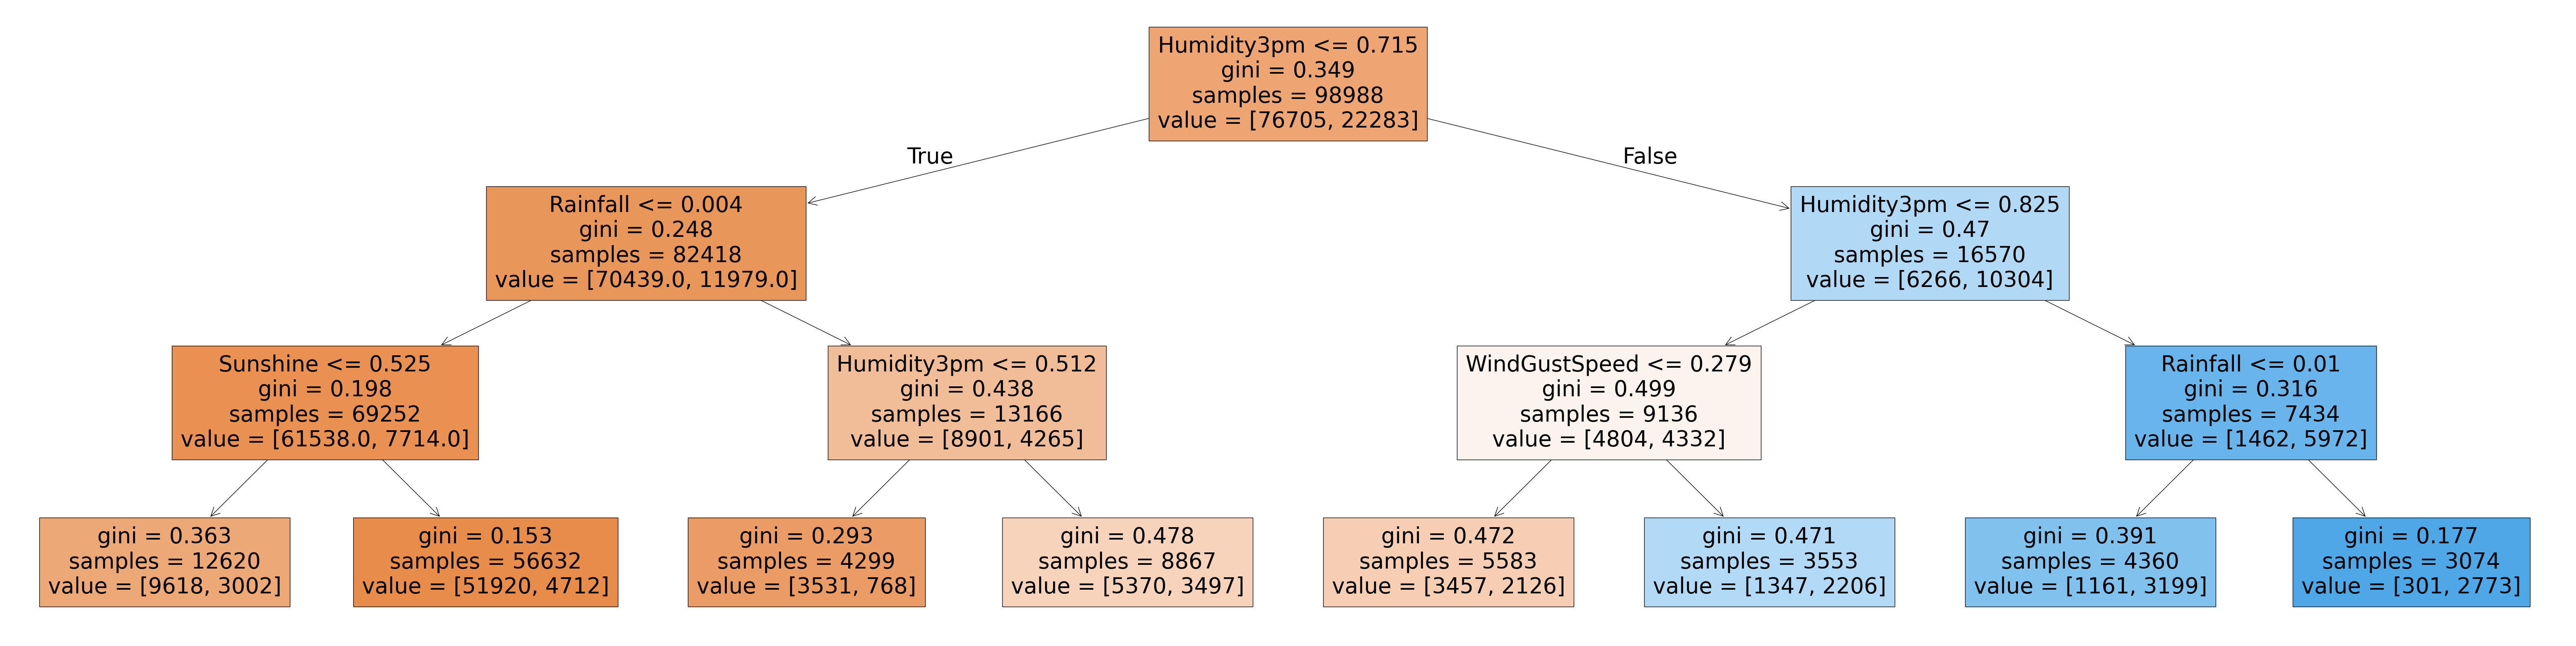

In [44]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=x_train.columns, filled=True);

In [45]:
def max_depth_error(md):
    model=DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(x_train,train_targets)
    train_error=1-model.score(x_train,train_targets)
    val_error=1-model.score(x_val,val_targets)
    return{'Max_depth': md, 'Trainning Error':train_error, 'Validation Error': val_error}
    

In [46]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])
errors_df


CPU times: total: 33.8 s
Wall time: 34.1 s


,Max_depth,Trainning Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157739
8,9,0.140916,0.156578
9,10,0.132966,0.157565


In [47]:
errors_df

,Max_depth,Trainning Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157739
8,9,0.140916,0.156578
9,10,0.132966,0.157565


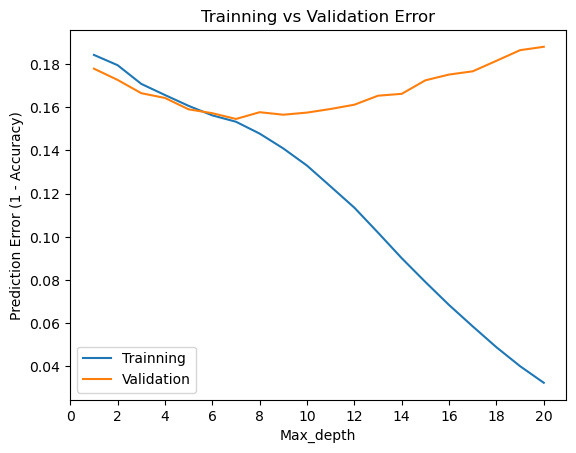

In [51]:


plt.figure()
plt.plot(errors_df['Max_depth'], errors_df['Trainning Error'])  # Fix spelling
plt.plot(errors_df['Max_depth'], errors_df['Validation Error'])
plt.title('Trainning vs Validation Error')
plt.xticks(range(0, 21, 2))  # Corrected from plt.xsticks
plt.xlabel('Max_depth')      # Corrected from plt.xlable
plt.ylabel('Prediction Error (1 - Accuracy)')  # Corrected from plt.ylable
plt.legend(['Trainning', 'Validation'])         # Fixed spelling
plt.show()



In [54]:
model=DecisionTreeClassifier(max_depth=7, random_state=42).fit(x_train, train_targets)
model.score(x_train,train_targets)  ,  model.score(x_val,val_targets)

(0.8466884874934335, 0.8453949277465034)

In [56]:
model=DecisionTreeClassifier(max_leaf_nodes=128, random_state= 42).fit(x_train,train_targets)#we can say that the max_leaf_nodes=128 because max_depth is 7 and the formula to calculate the max_leaf_node is 2^(max_depth) and here it is 2^7=128
model.score(x_train,train_targets)  ,  model.score(x_val,val_targets)

(0.8480421869317493, 0.8442342290058615)

In [57]:
model.tree_.max_depth

12